# GROUP 14 Code Notebook
### Gianina Flegueras, Jenny Lee, Neil Pandya, Jayson Tung

In [1]:
# Don't change this cell; just run it.
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

#new module (library)
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import r2_score

# Cleaning the Data:

In [2]:
def years_to_ints(yr):
    str_yr = int(yr[0:4])
    return str_yr

def convert_to_float(val):
    if (val=='..'):
        val = np.nan
    else:
        val = float(val)
    return val

def count_nan(row):
    return row.isna().sum()

# Generated Continents Dictionary from ChatGPT
continents = {
    'Africa': ['Egypt, Arab Rep.', 'Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cameroon', 'Central African Republic', 'Chad', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', 'Djibouti', 'Egypt', 'Equatorial Guinea', 'Eritrea', 'Eswatini', 'Ethiopia', 'Gabon', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Ivory Coast', 'Kenya', 'Lesotho', 'Liberia', 'Libya', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mauritius', 'Morocco', 'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Rwanda', 'Sao Tome and Principe', 'Senegal', 'Seychelles', 'Sierra Leone', 'Somalia', 'South Africa', 'South Sudan', 'Sudan', 'Tanzania', 'Togo', 'Tunisia', 'Uganda', 'Zambia', 'Zimbabwe'],
    'Asia': ["Cote d'Ivoire", 'West Bank and Gaza', 'Brunei Darussalam', 'Afghanistan', 'Armenia', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Bhutan', 'Brunei', 'Cambodia', 'China', 'Cyprus', 'Georgia', 'India', 'Indonesia', 'Iran', 'Iraq', 'Israel', 'Japan', 'Jordan', 'Kazakhstan', 'Kuwait', 'Kyrgyzstan', 'Laos', 'Lebanon', 'Malaysia', 'Maldives', 'Mongolia', 'Myanmar', 'Nepal', 'North Korea', 'Oman', 'Pakistan', 'Palestine', 'Philippines', 'Qatar', 'Saudi Arabia', 'Singapore', 'South Korea', 'Sri Lanka', 'Syria', 'Tajikistan', 'Thailand', 'Timor-Leste', 'Turkey', 'Turkmenistan', 'United Arab Emirates', 'Uzbekistan', 'Vietnam', 'Yemen, Rep.'],
    'Europe': ['Faroe Islands', 'Czechia', 'Channel Islands', 'Albania', 'Andorra', 'Austria', 'Belarus', 'Belgium', 'Bosnia and Herzegovina', 'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Italy', 'Kosovo', 'Latvia', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Malta', 'Moldova', 'Monaco', 'Montenegro', 'Netherlands', 'North Macedonia', 'Norway', 'Poland', 'Portugal', 'Romania', 'Russia', 'San Marino', 'Serbia', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Ukraine', 'United Kingdom', 'Vatican City'],
    'North America': ['Curacao', 'Cayman Islands', 'Virgin Islands (U.S.)', 'British Virgin Islands', 'Antigua and Barbuda', 'Aruba', 'Bahamas, The', 'Barbados', 'Bermuda', 'Belize', 'Canada', 'Costa Rica', 'Cuba', 'Dominica', 'Dominican Republic', 'El Salvador', 'Grenada', 'Guatemala', 'Haiti', 'Honduras', 'Jamaica', 'Mexico', 'Nicaragua', 'Panama', 'Saint Kitts and Nevis', 'Saint Lucia', 'Saint Vincent and the Grenadines', 'Trinidad and Tobago', 'United States'],
    'South America': ['Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia', 'Ecuador', 'Guyana', 'Paraguay', 'Peru', 'Suriname', 'Uruguay', 'Venezuela'],
    'Oceania': ['French Polynesia', 'Australia', 'American Samoa', 'Fiji', 'Kiribati', 'Marshall Islands', 'Micronesia', 'Nauru', 'New Zealand', 'Palau', 'Papua New Guinea', 'Samoa', 'Solomon Islands', 'Tonga', 'Tuvalu', 'Vanuatu']
}
continents_2 = {
    'Africa': ['Gambia, The'],
    'Europe': ['Gibraltar', 'Greenland', 'Isle of Man', 'Russian Federation', 'Slovak Republic'],
    'Oceania': ['Guam', 'Micronesia, Fed. Sts.', 'New Caledonia', 'Northern Mariana Islands'],
    'Asia': ['Hong Kong SAR, China', 'Iran, Islamic Rep.', 'Korea, Dem. People\'s Rep.', 'Korea, Rep.', 'Kyrgyz Republic', 'Lao PDR', 'Macao SAR, China', 'Syrian Arab Republic', 'Turkiye', 'Viet Nam'],
    'North America': ['Puerto Rico', 'Sint Maarten (Dutch part)', 'St. Kitts and Nevis', 'St. Lucia', 'St. Martin (French part)', 'St. Vincent and the Grenadines', 'Turks and Caicos Islands'],
    'South America': ['Venezuela, RB']
}

upper_income = ["Albania", "American Samoa", "Andorra", "Antigua and Barbuda", "Argentina", "Armenia", "Aruba", "Australia", "Austria", "Azerbaijan", "Bahamas, The", "Bahrain", "Barbados", "Belarus", "Belgium", "Belize", "Bermuda", "Bosnia and Herzegovina", "Botswana", "Brazil", "British Virgin Islands", "Brunei Darussalam", "Bulgaria", "Canada", "Cayman Islands", "Channel Islands", "Chile", "China", "Colombia", "Costa Rica", "Croatia", "Cuba", "Curacao", "Cyprus", "Czechia", "Denmark", "Dominica", "Dominican Republic", "Ecuador", "El Salvador", "Equatorial Guinea", "Estonia", "Faroe Islands", "Fiji", "Finland", "France", "French Polynesia", "Gabon", "Georgia", "Germany", "Gibraltar", "Greece", "Greenland", "Grenada", "Guam", "Guatemala", "Guyana", "Hong Kong SAR, China", "Hungary", "Iceland", "Indonesia", "Iraq", "Ireland", "Isle of Man", "Israel", "Italy", "Jamaica", "Japan", "Kazakhstan", "Korea, Rep.", "Kosovo", "Kuwait", "Latvia", "Libya", "Liechtenstein", "Lithuania", "Luxembourg", "Macao SAR, China", "Malaysia", "Maldives", "Malta", "Marshall Islands", "Mauritius", "Mexico", "Moldova", "Monaco", "Montenegro", "Namibia", "Nauru", "Netherlands", "New Caledonia", "New Zealand", "North Macedonia", "Northern Mariana Islands", "Norway", "Oman", "Palau", "Panama", "Paraguay", "Peru", "Poland", "Portugal", "Puerto Rico", "Qatar", "Romania", "Russian Federation", "San Marino", "Saudi Arabia", "Serbia", "Seychelles", "Singapore", "Sint Maarten (Dutch part)", "Slovak Republic", "Slovenia", "South Africa", "Spain", "St. Kitts and Nevis", "St. Lucia", "St. Martin (French part)", "St. Vincent and the Grenadines", "Suriname", "Sweden", "Switzerland", "Thailand", "Tonga", "Trinidad and Tobago", "Turkiye", "Turkmenistan", "Turks and Caicos Islands", "Tuvalu", "United Arab Emirates", "United Kingdom", "United States", "Uruguay", "Virgin Islands (U.S.)", "West Bank and Gaza"]
lower_income = ["Afghanistan", "Algeria", "Angola", "Bangladesh", "Benin", "Bhutan", "Bolivia", "Burkina Faso", "Burundi", "Cabo Verde", "Cambodia", "Cameroon", "Central African Republic", "Chad", "Comoros", "Congo, Dem. Rep.", "Congo, Rep.", "Cote d'Ivoire", "Djibouti", "Egypt, Arab Rep.", "Eritrea", "Eswatini", "Ethiopia", "Gambia, The", "Ghana", "Guinea", "Guinea-Bissau", "Haiti", "Honduras", "India", "Iran, Islamic Rep.", "Jordan", "Kenya", "Kiribati", "Korea, Dem. People's Rep.", "Kyrgyz Republic", "Lao PDR", "Lebanon", "Lesotho", "Liberia", "Madagascar", "Malawi", "Mali", "Mauritania", "Micronesia, Fed. Sts.", "Mongolia", "Morocco", "Mozambique", "Myanmar", "Nepal", "Nicaragua", "Niger", "Nigeria", "Pakistan", "Papua New Guinea", "Philippines", "Rwanda", "Samoa", "Sao Tome and Principe", "Senegal", "Sierra Leone", "Solomon Islands", "Somalia", "South Sudan", "Sri Lanka", "Sudan", "Syrian Arab Republic", "Tajikistan", "Tanzania", "Timor-Leste", "Togo", "Tunisia", "Uganda", "Ukraine", "Uzbekistan", "Vanuatu", "Venezuela, RB", "Viet Nam", "Yemen, Rep.", "Zambia", "Zimbabwe"]


def map_country_to_continent(country):
    for continent, countries in continents.items():
        if country in countries:
            return continent
    for continent, countries in continents_2.items():
        if country in countries:
            return continent
    return None

def map_country_to_income(country):
    if country in upper_income:
        return 'Upper Income'
    elif country in lower_income:
        return 'Lower Income'
    return None

def standardize_migration(row):
    return row['Net migration'] / row['Population, total']

def binarize_income(income):
    if income == "Upper Income":
        return 1
    return 0

world_bank = pd.read_csv('updated_wb_data.csv')  # change file path as needed
world_bank = world_bank.dropna()

ids = ['Series Name', 'Series Code', 'Country Name', 'Country Code']
yrs = ['2000 [YR2000]', '2005 [YR2005]', '2010 [YR2010]', '2011 [YR2011]','2012 [YR2012]', '2013 [YR2013]', '2014 [YR2014]', '2015 [YR2015]','2016 [YR2016]', '2017 [YR2017]', '2018 [YR2018]', '2019 [YR2019]','2020 [YR2020]', '2021 [YR2021]', '2022 [YR2022]', '2023 [YR2023]']
world_bank = pd.melt(world_bank, id_vars=ids, value_vars=yrs,var_name='Year', value_name='cases')
world_bank = pd.pivot_table(world_bank, values='cases', index=['Country Name', 'Country Code', 'Year'], columns=['Series Name', 'Series Code'], aggfunc='sum')
world_bank = world_bank.reset_index()
world_bank['Year'] = world_bank['Year'].apply(years_to_ints)
world_bank.columns = world_bank.columns.get_level_values(0)
for column in world_bank.columns[3:]:
    world_bank[column] = world_bank[column].apply(convert_to_float)

world_bank['Continent'] = world_bank['Country Name'].apply(map_country_to_continent)
world_bank['Income'] = world_bank['Country Name'].apply(map_country_to_income)

print(world_bank.shape)

# Transformations
world_bank['Binarized Income'] = world_bank['Income'].apply(binarize_income)
world_bank["log(Domestic general government health expenditure per capita (current US$))"] = np.log(world_bank["Domestic general government health expenditure per capita (current US$)"])
world_bank["log(Hospital Beds)"] = np.log(world_bank["Hospital beds (per 1,000 people)"])
world_bank["log(R&D)"] = np.log(world_bank["Research and development expenditure (% of GDP)"])

(3472, 43)


We initially included these CPIA variables – they are not relevant at all to our analysis and have very little data so we will just directly remove them from our dataset. 

In [3]:
cpia_list = ['CPIA business regulatory environment rating (1=low to 6=high)', 
             'CPIA efficiency of revenue mobilization rating (1=low to 6=high)', 
            'CPIA equity of public resource use rating (1=low to 6=high)', 
            'CPIA macroeconomic management rating (1=low to 6=high)']
world_bank.drop(columns=cpia_list, inplace=True)
world_bank

Series Name Country Name Country Code  Year  \
0            Afghanistan          AFG  2000   
1            Afghanistan          AFG  2005   
2            Afghanistan          AFG  2010   
3            Afghanistan          AFG  2011   
4            Afghanistan          AFG  2012   
...                  ...          ...   ...   
3467            Zimbabwe          ZWE  2019   
3468            Zimbabwe          ZWE  2020   
3469            Zimbabwe          ZWE  2021   
3470            Zimbabwe          ZWE  2022   
3471            Zimbabwe          ZWE  2023   

Series Name  Adjusted net enrollment rate, primary (% of primary school age children)  \
0                                                          NaN                          
1                                                          NaN                          
2                                                          NaN                          
3                                                          NaN                          
4                                                          NaN                          
...                                                        ...                          
3467                                                       NaN                          
3468                                                       NaN                          
3469                                                       NaN                          
3470                                                       NaN                          
3471                                                       NaN                          

Series Name  Community health workers (per 1,000 people)  \
0                                                    NaN   
1                                                    NaN   
2                                                    NaN   
3                                                    NaN   
4                                                    NaN   
...                                                  ...   
3467                                                 NaN   
3468                                                 NaN   
3469                                                 NaN   
3470                                                 NaN   
3471                                                 NaN   

Series Name  Control of Corruption: Estimate  \
0                                  -1.271724   
1                                  -1.447252   
2                                  -1.645391   
3                                  -1.600471   
4                                  -1.430373   
...                                      ...   
3467                               -1.271190   
3468                               -1.287992   
3469                               -1.253550   
3470                               -1.255139   
3471                                     NaN   

Series Name  Control of Corruption: Percentile Rank  \
0                                          4.787234   
1                                          1.463415   
2                                          0.952381   
3                                          0.473934   
4                                          1.421801   
...                                             ...   
3467                                      10.000000   
3468                                      10.000000   
3469                                      10.000000   
3470                                       8.490566   
3471                                            NaN   

Series Name  Domestic general government health expenditure (% of general government expenditure)  \
0                                                          NaN                                      
1                                                     3.370978                                      
2                                                     2.255471                                      
3  

# Exploratory Data Analysis

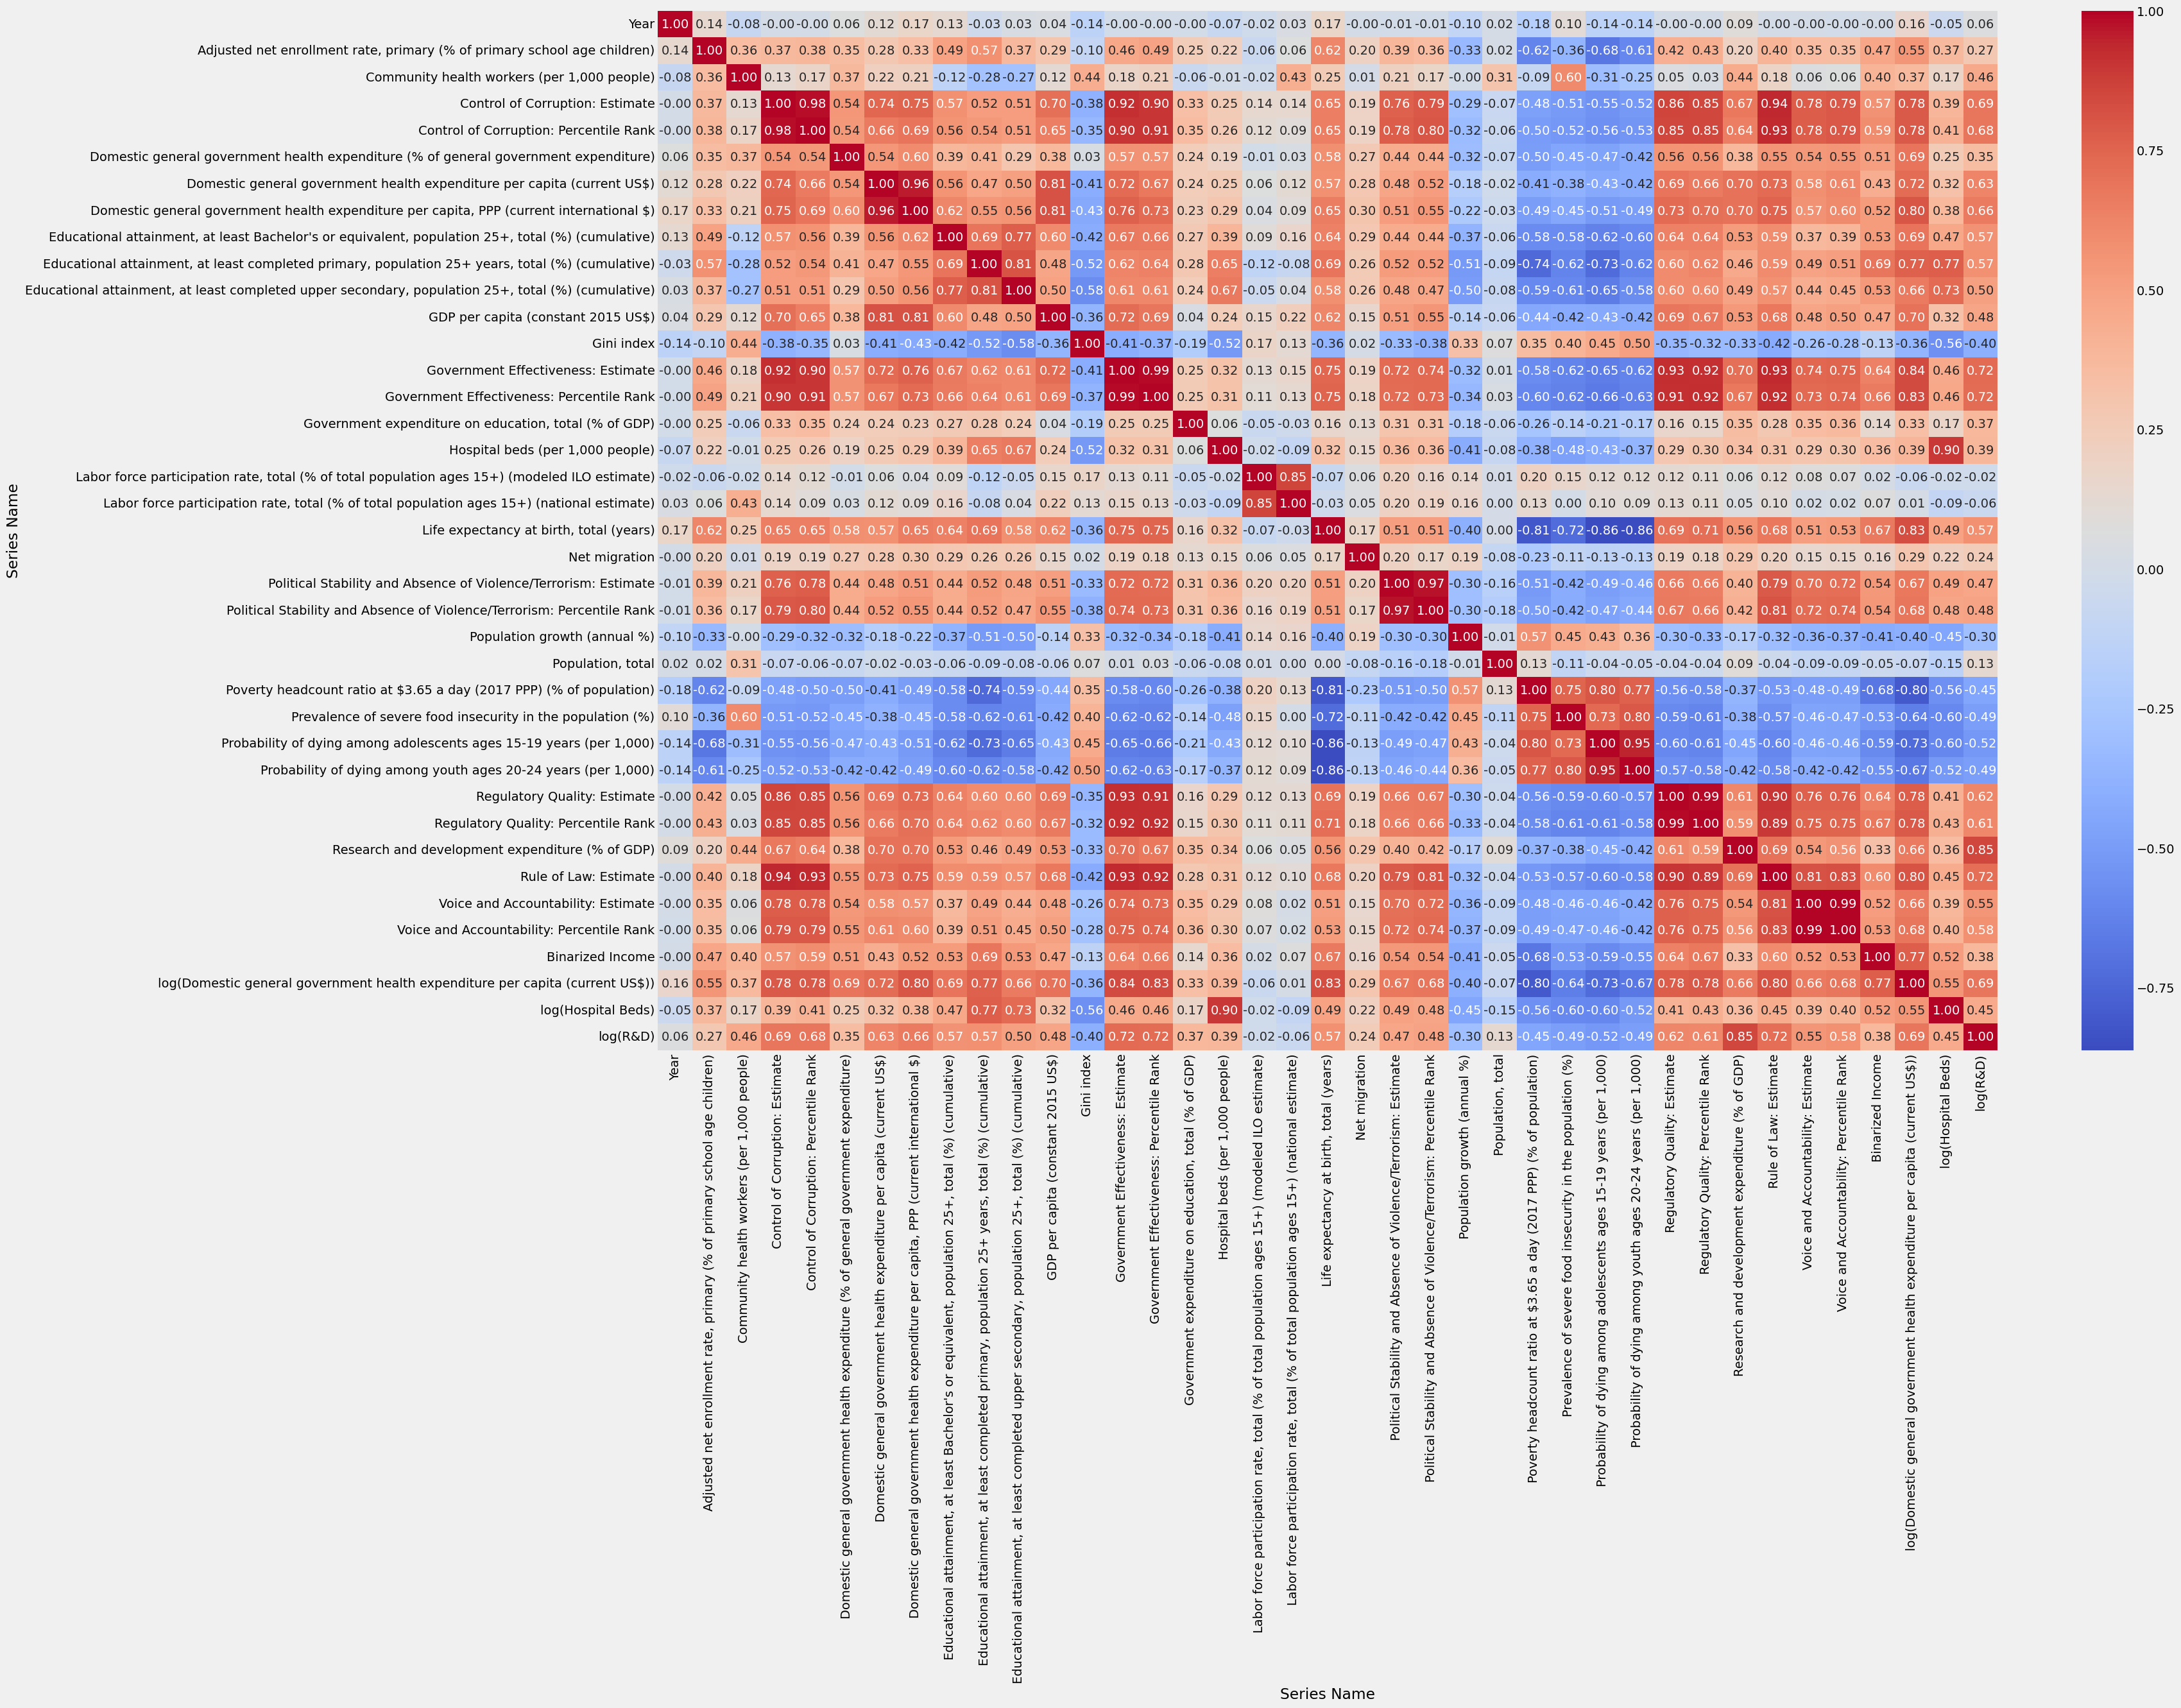

In [4]:
import seaborn as sns

numerical = world_bank.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numerical.corr()

plt.figure(figsize=(30, 20))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

Indicators chosen:

In [5]:
education = ['Adjusted net enrollment rate, primary (% of primary school age children)']
political = ['Control of Corruption: Estimate',
             'Government Effectiveness: Estimate',
             'Political Stability and Absence of Violence/Terrorism: Estimate',
             'Regulatory Quality: Estimate',
             'Voice and Accountability: Estimate',
             'Rule of Law: Estimate',
             'Binarized Income']
health = ['log(Domestic general government health expenditure per capita (current US$))', 
          'Population growth (annual %)', 
          'Probability of dying among youth ages 20-24 years (per 1,000)',
          'Life expectancy at birth, total (years)']

In [6]:
indicators = education + political + health
response = 'Poverty headcount ratio at $3.65 a day (2017 PPP) (% of population)'

Check missing data:

In [7]:
missing_data_percentage = world_bank[indicators].isnull().mean() * 100
indicators_with_most_missing_data = missing_data_percentage.sort_values(ascending=False)

print(indicators_with_most_missing_data)

Series Name
Adjusted net enrollment rate, primary (% of primary school age children)        61.002304
log(Domestic general government health expenditure per capita (current US$))    29.723502
Probability of dying among youth ages 20-24 years (per 1,000)                   20.967742
Life expectancy at birth, total (years)                                         15.380184
Government Effectiveness: Estimate                                              12.644009
Regulatory Quality: Estimate                                                    12.615207
Voice and Accountability: Estimate                                              12.471198
Control of Corruption: Estimate                                                 12.442396
Political Stability and Absence of Violence/Terrorism: Estimate                 12.096774
Rule of Law: Estimate                                                           11.751152
Population growth (annual %)                                                     6.27880

## Multiple Regression Indicators:

When we plot each of these indicators against Poverty Headcount Ratio, we noticed a lot of heterskedacity in the scatterplots:

### Relationships before transforming response variable:

In [8]:
world_bank['sqrt(y)'] = np.sqrt(world_bank['Poverty headcount ratio at $3.65 a day (2017 PPP) (% of population)'])

In [9]:
import matplotlib.patches as mpatches 

def scatterplot(df, x, y):
    '''Creates a scatterplot of x and y, and colors the points according to the origin class''' 
    plt.scatter(df.loc[df['Binarized Income']== 0][x], df.loc[df['Binarized Income']== 0][y], color='palevioletred', s=30, alpha=0.5)
    plt.scatter(df.loc[df['Binarized Income']== 1][x], df.loc[df['Binarized Income']== 1][y], color='cadetblue', s=30, alpha=0.5)

    pink_patch = mpatches.Patch(color='palevioletred', label='Lower Income') # 0 is lower income
    blue_patch = mpatches.Patch(color='cadetblue', label='Upper Income') # 1 is upper income
    plt.legend(handles=[pink_patch, blue_patch], fontsize='small')
    
    plt.xlabel(x, fontsize=12)
    if y == 'sqrt(y)':
        plt.ylabel('sqrt(Poverty headcount ratio at $3.65 a day\n (2017 PPP) (% of population))', fontsize=12)
        plt.title(x + ' \nvs ' + 'sqrt(Poverty headcount ratio at $3.65 a day\n (2017 PPP) (% of population))', fontsize=12)
    else:
        plt.ylabel('Poverty headcount ratio at $3.65 a day\n (2017 PPP) (% of population)', fontsize=12)
        plt.title(x + ' vs\n ' + 'Poverty headcount ratio at $3.65 a day\n (2017 PPP) (% of population)', fontsize=12)
    
    plt.show()
    return 

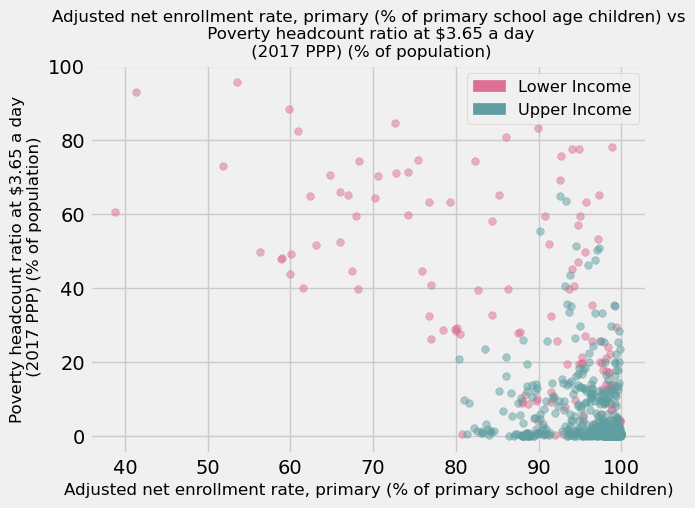

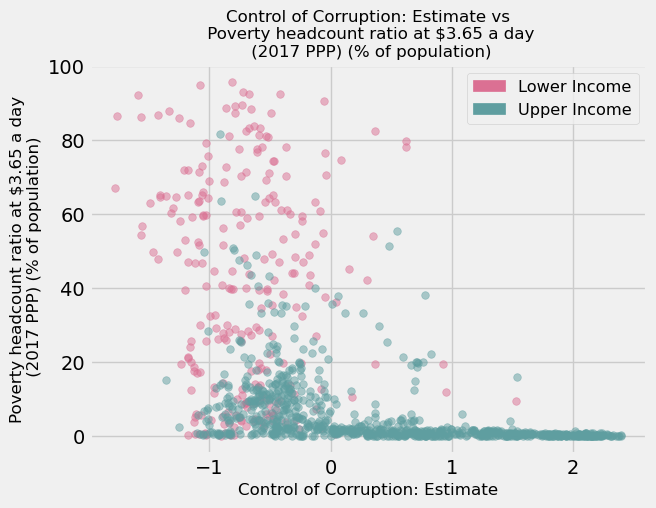

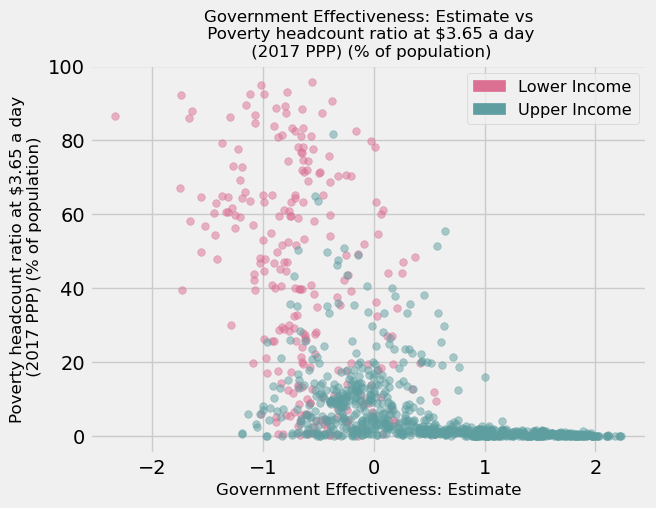

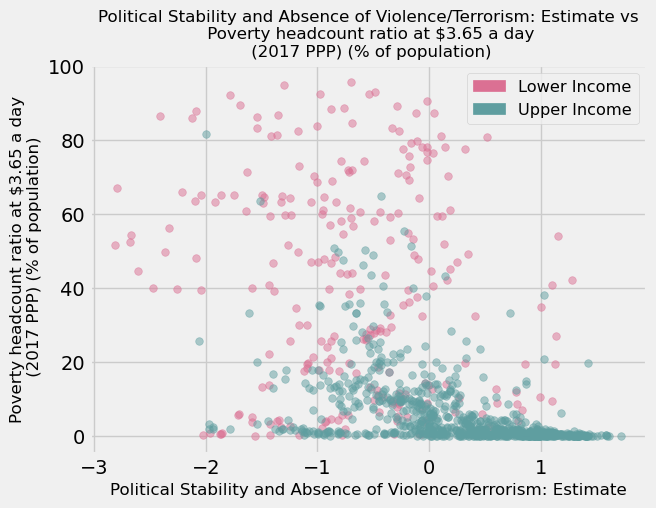

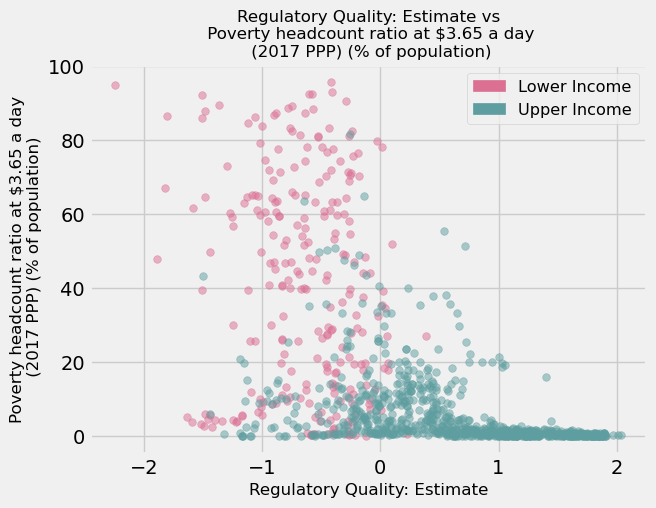

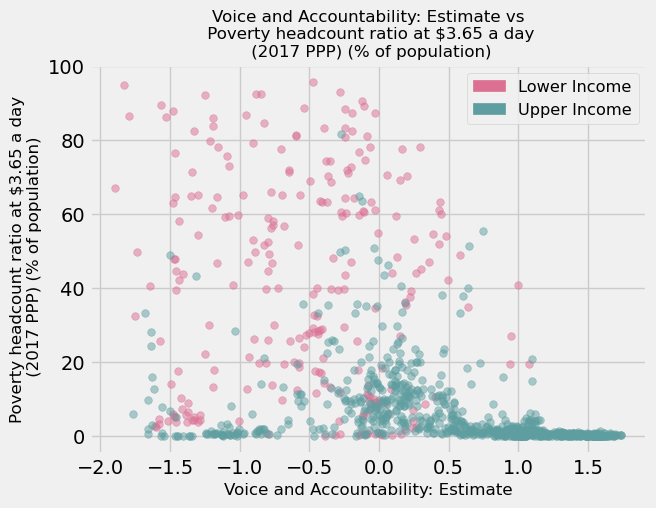

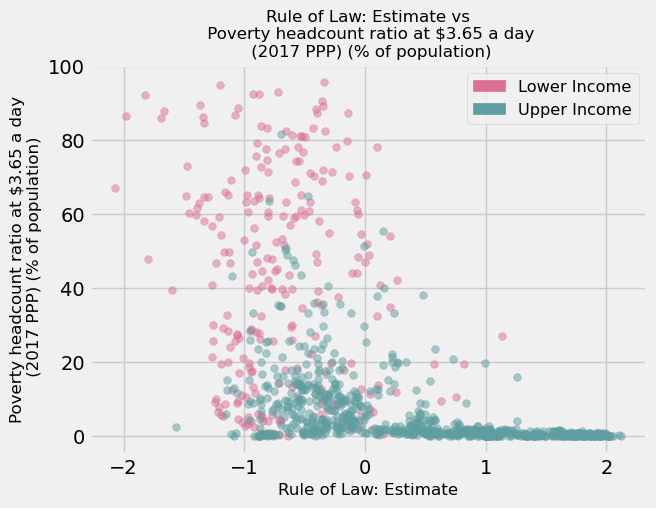

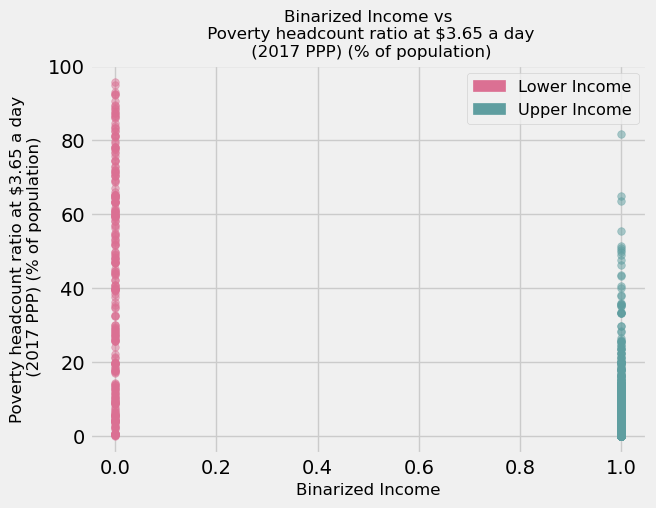

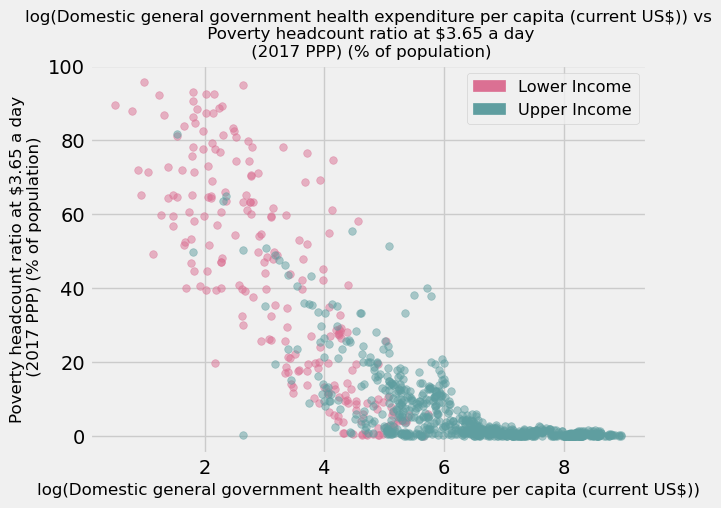

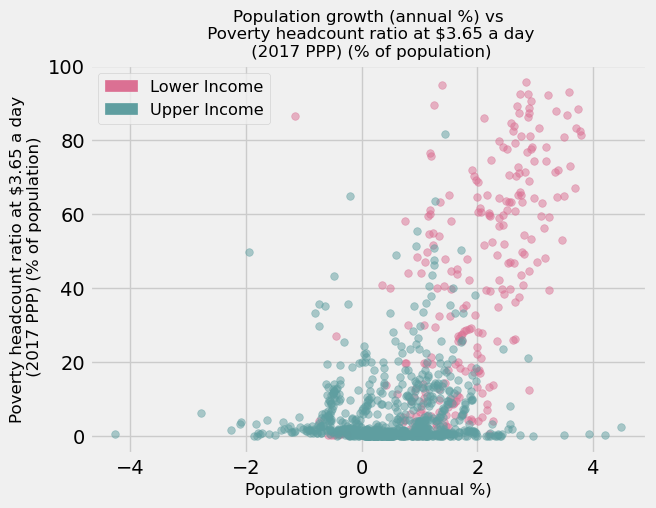

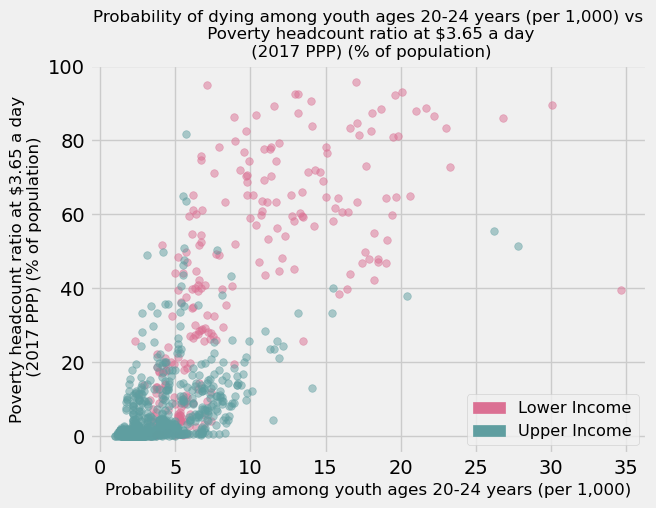

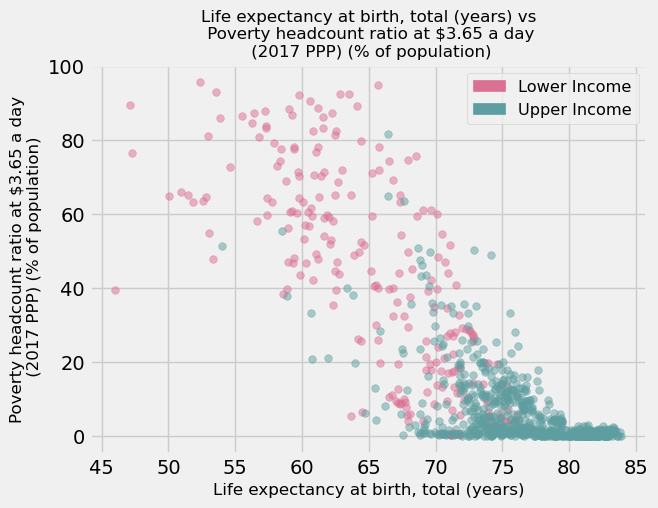

In [10]:
for indicator in indicators:
    scatterplot(world_bank, indicator, "Poverty headcount ratio at $3.65 a day (2017 PPP) (% of population)")

So, we decided to use a square-root transformation on the response variable. The intuition is that 

### Relationships after transforming response variable: 
#### Poverty Headcount Ratio --> Sqrt(Poverty Headcount Ratio)

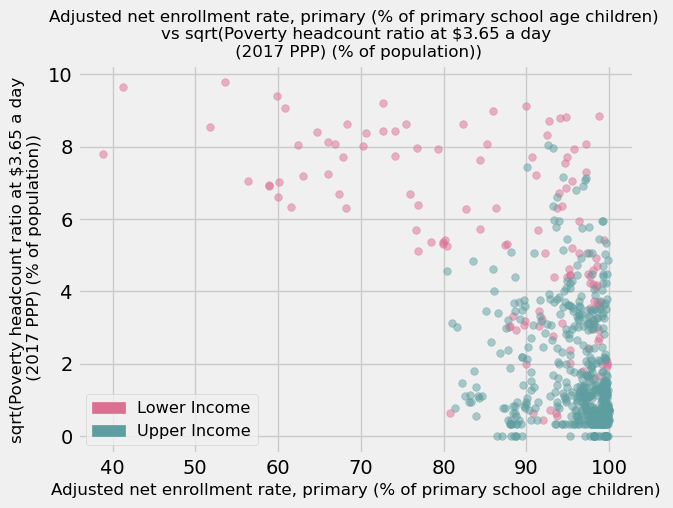

Correlation coefficient between Adjusted net enrollment rate, primary (% of primary school age children) and Poverty headcount ratio at $3.65 a day (2017 PPP) (% of population) is -0.5583272963464911


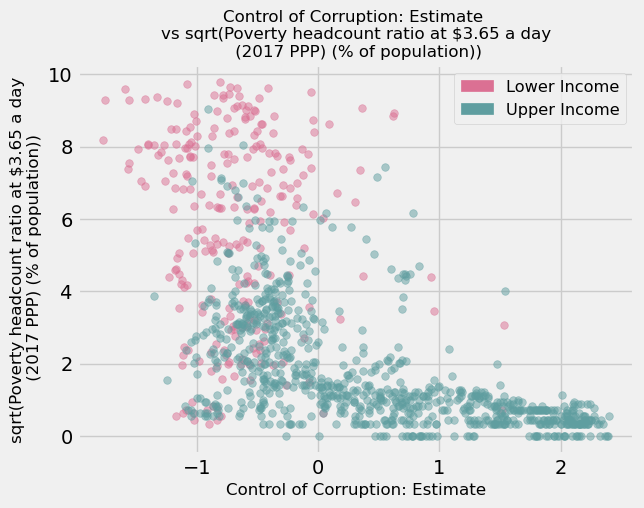

Correlation coefficient between Control of Corruption: Estimate and Poverty headcount ratio at $3.65 a day (2017 PPP) (% of population) is -0.6061720936302958


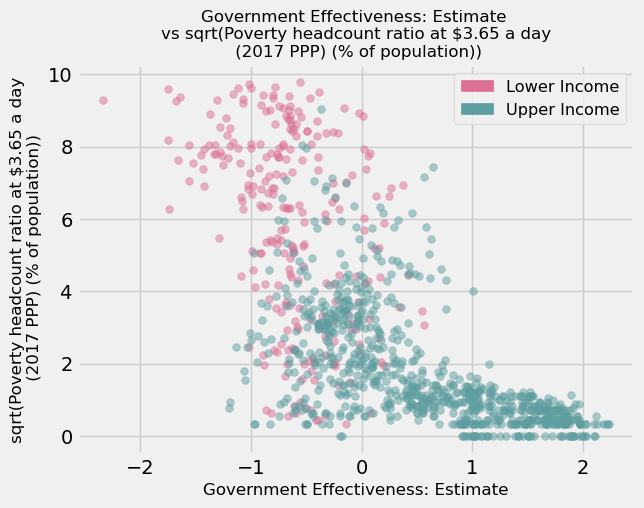

Correlation coefficient between Government Effectiveness: Estimate and Poverty headcount ratio at $3.65 a day (2017 PPP) (% of population) is -0.694754270727544


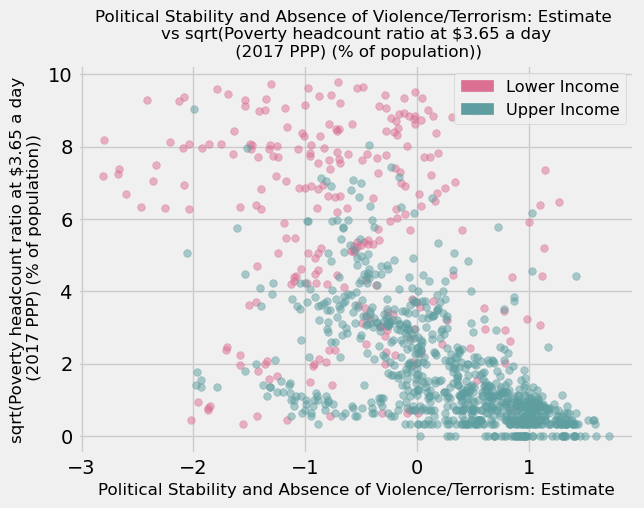

Correlation coefficient between Political Stability and Absence of Violence/Terrorism: Estimate and Poverty headcount ratio at $3.65 a day (2017 PPP) (% of population) is -0.5919980124876568


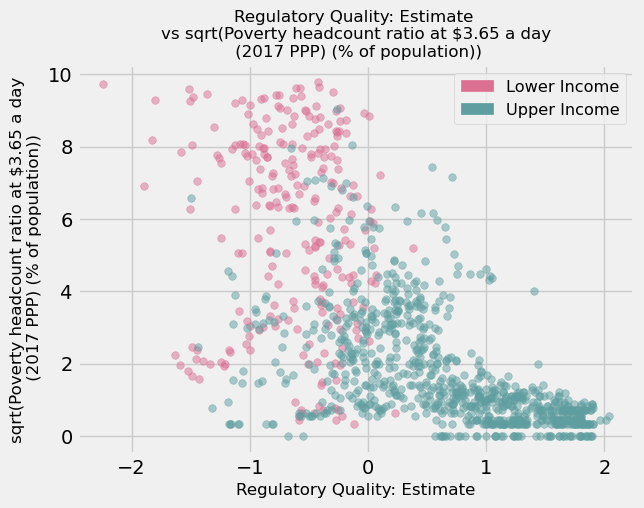

Correlation coefficient between Regulatory Quality: Estimate and Poverty headcount ratio at $3.65 a day (2017 PPP) (% of population) is -0.6554003338193224


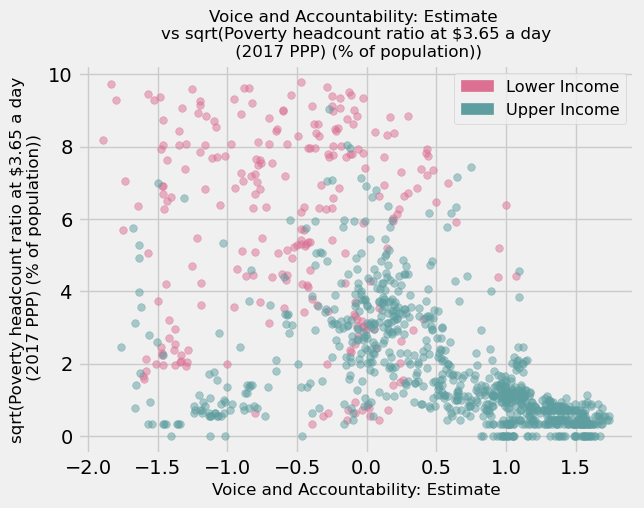

Correlation coefficient between Voice and Accountability: Estimate and Poverty headcount ratio at $3.65 a day (2017 PPP) (% of population) is -0.5677454975140207


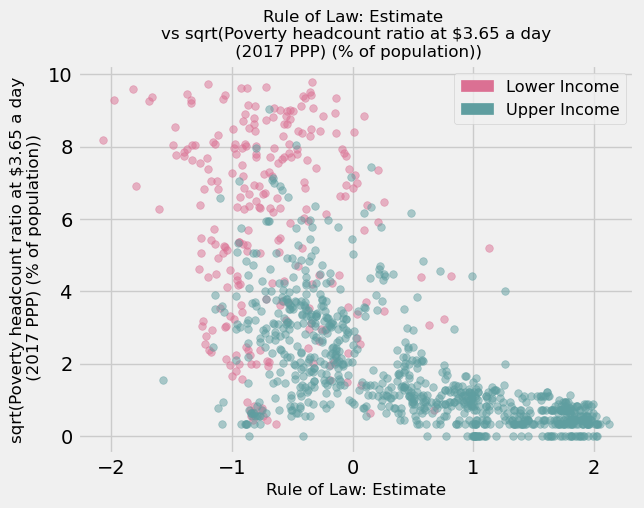

Correlation coefficient between Rule of Law: Estimate and Poverty headcount ratio at $3.65 a day (2017 PPP) (% of population) is -0.6503746191047657


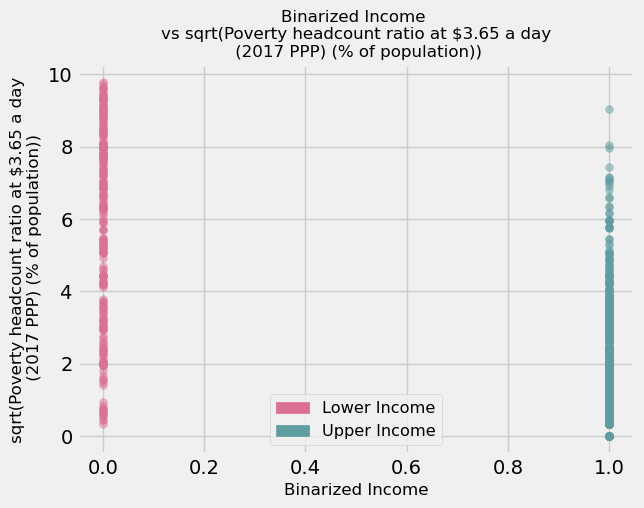

Correlation coefficient between Binarized Income and Poverty headcount ratio at $3.65 a day (2017 PPP) (% of population) is -0.6757343726807324


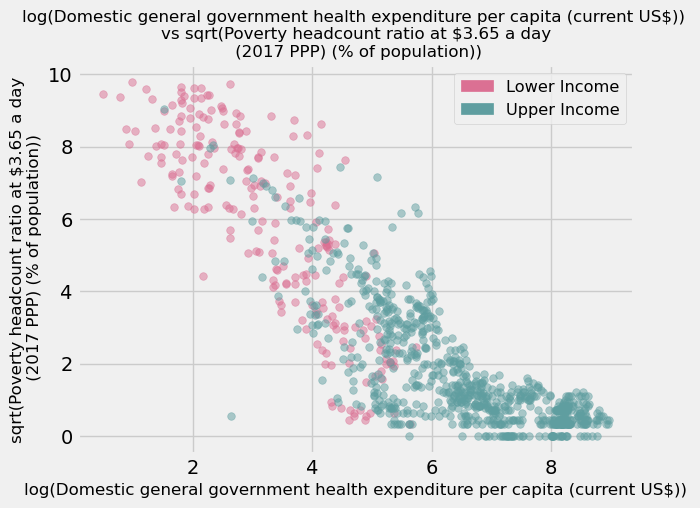

Correlation coefficient between log(Domestic general government health expenditure per capita (current US$)) and Poverty headcount ratio at $3.65 a day (2017 PPP) (% of population) is -0.8688552422275522


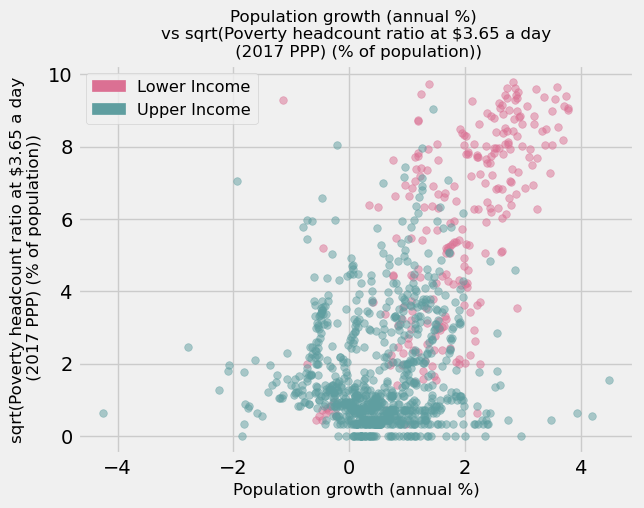

Correlation coefficient between Population growth (annual %) and Poverty headcount ratio at $3.65 a day (2017 PPP) (% of population) is 0.5372001080477059


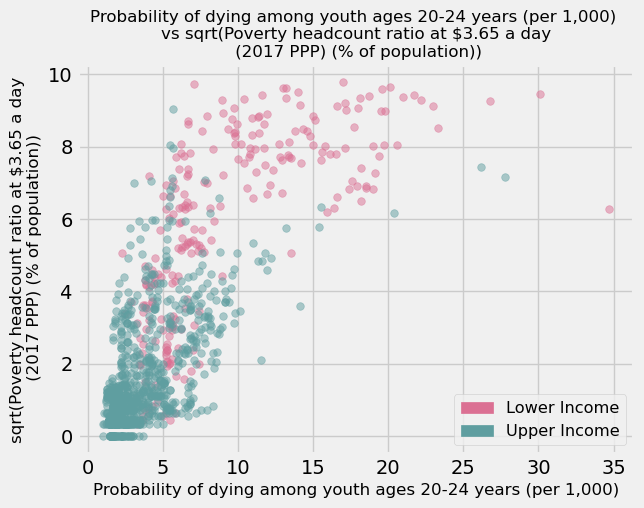

Correlation coefficient between Probability of dying among youth ages 20-24 years (per 1,000) and Poverty headcount ratio at $3.65 a day (2017 PPP) (% of population) is 0.7610769073454403


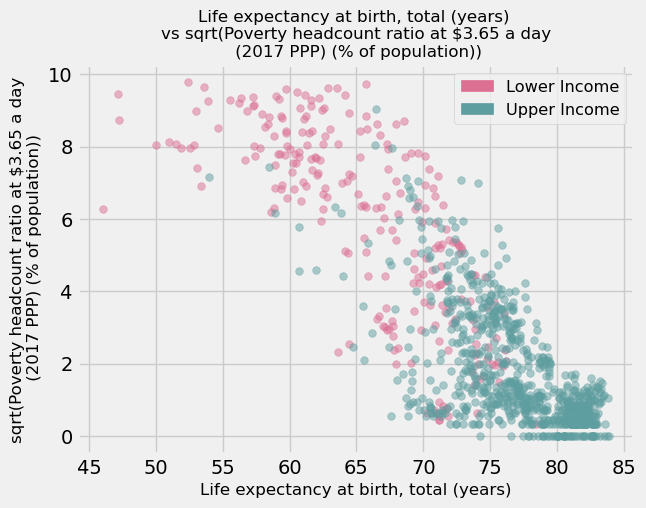

Correlation coefficient between Life expectancy at birth, total (years) and Poverty headcount ratio at $3.65 a day (2017 PPP) (% of population) is -0.8361285422226757


In [11]:
for indicator in indicators:
    scatterplot(world_bank, indicator, "sqrt(y)")
    print(f'Correlation coefficient between {indicator} and {response} is {world_bank["sqrt(y)"].corr(world_bank[indicator])}')

# Model 1: Predicting Poverty Headcount using LASSO

In [12]:
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import KFold, train_test_split

In [13]:
x = world_bank[indicators]
y = world_bank[response]
nan_indices_x = np.isnan(x).any(axis=1)
nan_indices_y = np.isnan(y.values.flatten())
nan_indices = np.logical_or(nan_indices_x, nan_indices_y)
x = x[~nan_indices]
y = y[~nan_indices]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=123)
y_test_normal = y_test
y_train_normal = y_train
y_test = np.sqrt(y_test)
y_train = np.sqrt(y_train)

y_train_2D = np.array(y_train).reshape(-1,1)
scalerY = StandardScaler().fit(y_train_2D)
y_train_scaled = scalerY.transform(y_train_2D)
scalerX = StandardScaler().fit(x_train)
x_train_scaled = scalerX.transform(x_train)

lasso_best = LassoCV(cv=4, max_iter=10000)
lasso_best.fit(x_train_scaled, y_train_scaled.flatten())
lasso_best.intercept_, lasso_best.coef_, lasso_best.alpha_

(-2.238590147816545e-16,
 array([-0.        ,  0.05666016, -0.        , -0.16587402,  0.01954984,
         0.2630176 , -0.        , -0.00855903, -0.79789666,  0.09345671,
         0.25407679, -0.        ]),
 0.009234522821104688)

Below is a sanity check for Voice and Accountability. In our regression, Lasso made the coefficient positive, however, it is still evident that with the training data, the negative correlation can still be seen even with the training data.

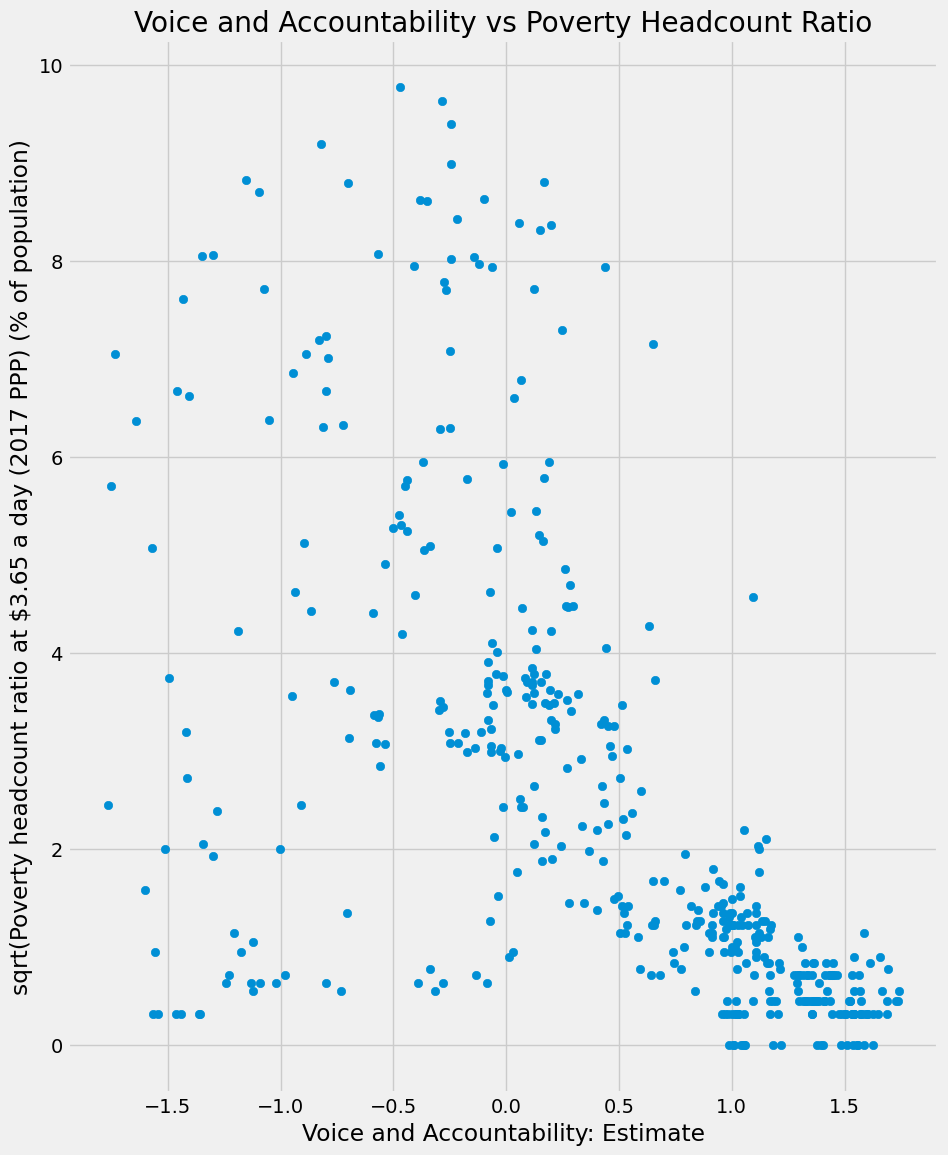

In [14]:
plt.figure(figsize=(10,13))
plt.scatter(x_train['Voice and Accountability: Estimate'], y_train)
plt.title('Voice and Accountability vs Poverty Headcount Ratio')
plt.xlabel('Voice and Accountability: Estimate')
plt.ylabel('sqrt(Poverty headcount ratio at $3.65 a day (2017 PPP) (% of population)')
plt.show()

In [15]:
formula = f'{response} = {lasso_best.intercept_}'
for i, coef in enumerate(lasso_best.coef_):
    formula += f' + {indicators[i]}*{coef.round(4)}'
formula

'Poverty headcount ratio at $3.65 a day (2017 PPP) (% of population) = -2.238590147816545e-16 + Adjusted net enrollment rate, primary (% of primary school age children)*-0.0 + Control of Corruption: Estimate*0.0567 + Government Effectiveness: Estimate*-0.0 + Political Stability and Absence of Violence/Terrorism: Estimate*-0.1659 + Regulatory Quality: Estimate*0.0195 + Voice and Accountability: Estimate*0.263 + Rule of Law: Estimate*-0.0 + Binarized Income*-0.0086 + log(Domestic general government health expenditure per capita (current US$))*-0.7979 + Population growth (annual %)*0.0935 + Probability of dying among youth ages 20-24 years (per 1,000)*0.2541 + Life expectancy at birth, total (years)*-0.0'

$$\text{sqrt(Poverty headcount ratio at \$3.65 a day (2017 PPP) (\% of population))} = -2.238465383766168 \times 10^{-16} + \text{Adjusted net enrollment rate, primary (\% of primary school age children)} \times -0.0 \\
+ \text{Control of Corruption: Estimate} \times 0.0566 + \text{Government Effectiveness: Estimate} \times -0.0 \\
+ \text{Political Stability and Absence of Violence/Terrorism: Estimate} \times -0.1659 \\
+ \text{Regulatory Quality: Estimate} \times 0.0196 + \text{Voice and Accountability: Estimate} \times 0.263 \\
+ \text{Rule of Law: Estimate} \times -0.0 + \text{Binarized Income} \times -0.0086 \\
+ \text{Probability of dying among youth ages 20-24 years (per 1,000)} \times 0.254 \\
+ \text{Life expectancy at birth, total (years)} \times -0.0 + \log(\text{Health Expenditure}) \times -0.7979 \\
+ \text{Population growth (annual \%)} \times 0.0935$$

Before the transformation of the response by sqrt...

In [16]:
scalerX = StandardScaler().fit(x_test)
x_test_scaled = scalerX.transform(x_test)
y_test_2D = np.array(y_test_normal).reshape(-1,1)
scalerY = StandardScaler().fit(y_test_2D)
y_test_scaled = scalerY.transform(y_test_2D)

y_pred_lasso_scaled = lasso_best.predict(x_test_scaled)

r2 = r2_score(y_test_scaled, y_pred_lasso_scaled)
n = len(y_test_scaled)
p = len(indicators)
adjr2 = 1-(n-1)/(n-p-1)*(1-r2)
print(f'r^2 predicting y_test from x_test for Lasso Regression (BEFORE transformation) is {adjr2}')

r^2 predicting y_test from x_test for Lasso Regression (BEFORE transformation) is 0.7893912990030529


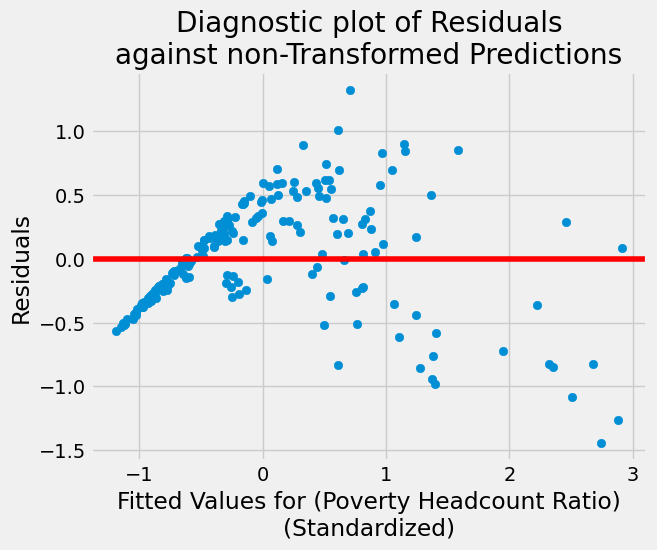

In [17]:
flattened_y_test_scaled = [element for sublist in y_test_scaled for element in sublist]
res = (y_pred_lasso_scaled - flattened_y_test_scaled)
plt.scatter(y_pred_lasso_scaled, res)
plt.title('Diagnostic plot of Residuals\nagainst non-Transformed Predictions')
plt.ylabel('Residuals')
plt.xlabel('Fitted Values for (Poverty Headcount Ratio)\n(Standardized)')
plt.axhline(y=0, color='r')
plt.show()

After the transformation of the response by sqrt...

In [18]:
scalerX = StandardScaler().fit(x_test)
x_test_scaled = scalerX.transform(x_test)
y_test_2D = np.array(y_test).reshape(-1,1)
scalerY = StandardScaler().fit(y_test_2D)
y_test_scaled = scalerY.transform(y_test_2D)

y_pred_lasso_scaled = lasso_best.predict(x_test_scaled)

r2 = r2_score(y_test_scaled, y_pred_lasso_scaled)
n = len(y_test_scaled)
p = len(indicators)
adjr2 = 1-(n-1)/(n-p-1)*(1-r2)
print(f'r^2 predicting y_test from x_test for Lasso Regression (AFTER transformation) is {adjr2}')

r^2 predicting y_test from x_test for Lasso Regression (AFTER transformation) is 0.851467593881035


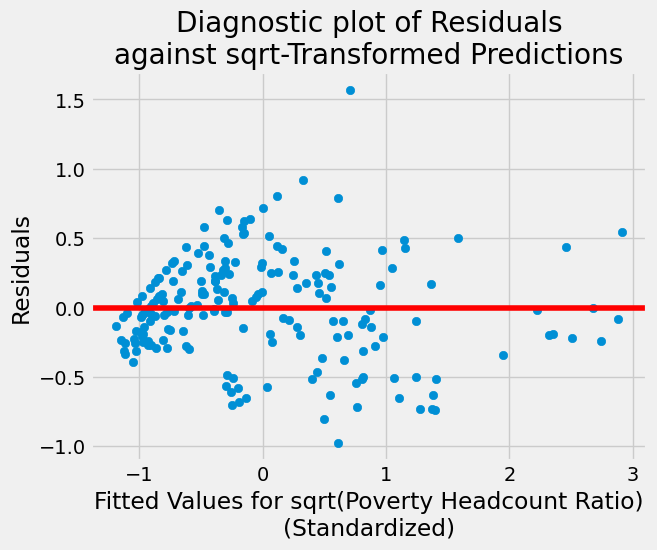

In [19]:
flattened_y_test_scaled = [element for sublist in y_test_scaled for element in sublist]
res = (y_pred_lasso_scaled - flattened_y_test_scaled)
plt.scatter(y_pred_lasso_scaled, res)
plt.title('Diagnostic plot of Residuals\nagainst sqrt-Transformed Predictions')
plt.ylabel('Residuals')
plt.xlabel('Fitted Values for sqrt(Poverty Headcount Ratio)\n(Standardized)')
plt.axhline(y=0, color='r')
plt.show()

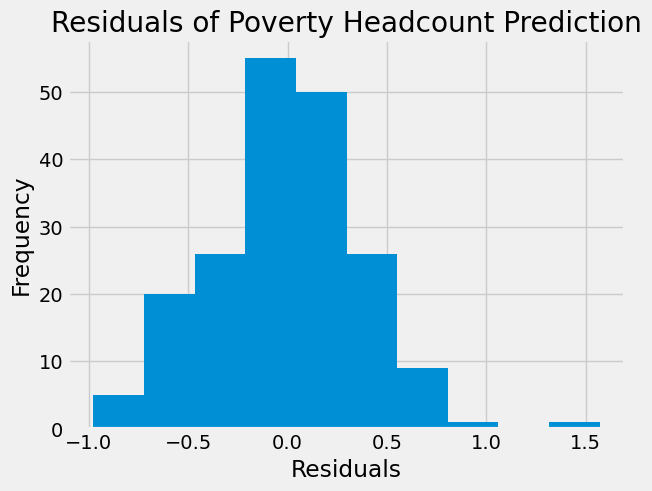

In [20]:
plt.hist(res, bins = 10)
plt.title('Residuals of Poverty Headcount Prediction')
plt.ylabel('Frequency')
plt.xlabel('Residuals');

K-Fold Cross Validation to test validity of using Lasso Regression model:

In [21]:
all_r2 = []
for (train_index, test_index) in (KFold(n_splits=10).split(x_train)):
    train_x = x_train.iloc[train_index, :]
    train_y = y_train.iloc[train_index]
    test_x = x_train.iloc[test_index, :]
    test_y = y_train.iloc[test_index]

    scalerX = StandardScaler().fit(train_x)
    train_x_scaled = scalerX.transform(train_x)
    test_x_scaled = scalerX.transform(test_x)
    train_y_2D = np.array(train_y).reshape(-1,1)
    test_y_2D = np.array(test_y).reshape(-1,1)
    scalerY = StandardScaler().fit(train_y_2D)
    train_y_scaled = scalerY.transform(train_y_2D)
    test_y_scaled = scalerY.transform(test_y_2D)

    lasso_best = LassoCV(cv=4, max_iter=10000)
    lasso_best.fit(train_x_scaled, train_y_scaled.flatten())

    y_pred_lasso_scaled = lasso_best.predict(test_x_scaled)
    r2 = r2_score(test_y_scaled, y_pred_lasso_scaled)
    n = len(test_y_scaled)
    p = len(indicators)
    adjr2 = 1-(n-1)/(n-p-1)*(1-r2)

    all_r2.append(adjr2)

np.mean(all_r2)

0.7721480395630164

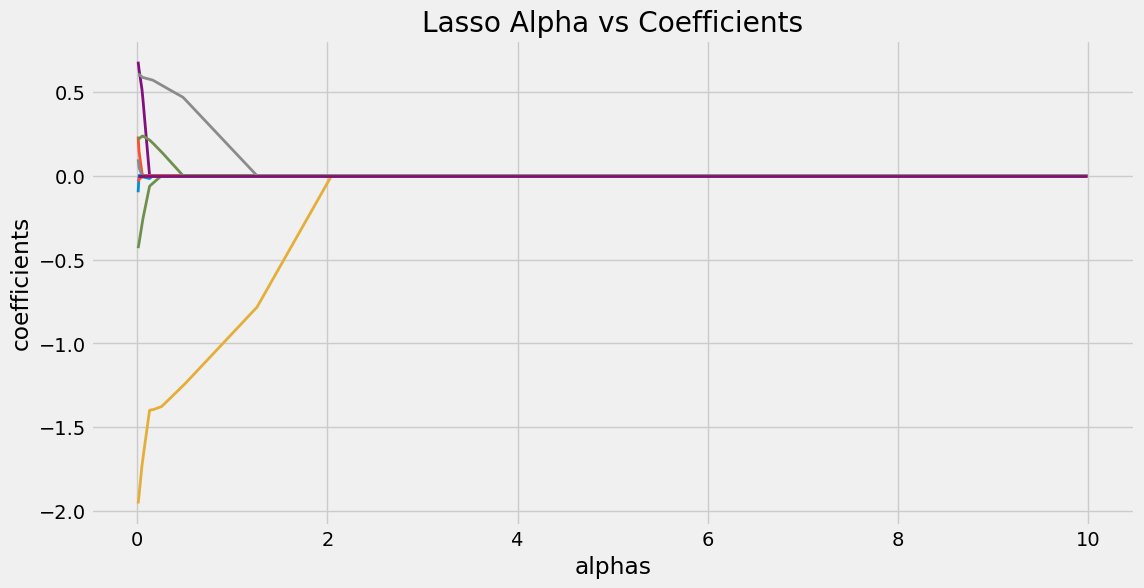

In [22]:
coefs = []
alphas = np.arange(.01, 10, .01)

for a in alphas:
    model = Lasso(alpha=a)
    model.fit(x_train_scaled, y_train)
    coefs.append(model.coef_.flatten())

#line plot of coefficient against alpha

plt.figure(figsize=(12, 6))  
plt.plot(alphas, coefs, linewidth=2);
plt.xlabel('alphas')
plt.ylabel('coefficients')
plt.title('Lasso Alpha vs Coefficients');

# Model 2: KNN Classification of Low vs High Income Country

In [23]:
def minmax_scaling(x):
    return (x - np.min(x))/(np.max(x)-np.min(x)) 

def distance(pt1, pt2):
    return np.sqrt(sum((pt1 - pt2)**2))

def closest_y_vals(x_train, y_train, point, response, k):
    distances = x_train.apply(lambda row: distance(np.array(row), np.array(point)), axis=1)
    df = pd.DataFrame({response: np.array(y_train), 'Distance_to_point': np.array(distances)})
    df = df.sort_values('Distance_to_point').reset_index(drop=True)
    topk = df.head(k)
    return topk

def classify(x_train, y_train, x_test, response, k):
    pred_class = np.array([])
    for i in np.arange(len(x_test)):
        topkclasses = closest_y_vals(x_train, y_train, x_test.iloc[i], response, k)
        pred_class = np.append(pred_class, topkclasses[response].value_counts().idxmax())
    report_df = x_test.copy()
    report_df['Predicted_Class'] = pred_class
    return report_df

In [24]:
education = ['Adjusted net enrollment rate, primary (% of primary school age children)']
political = ['Control of Corruption: Estimate',
             'Government Effectiveness: Estimate',
             'Political Stability and Absence of Violence/Terrorism: Estimate',
             'Regulatory Quality: Estimate',
             'Voice and Accountability: Estimate',
             'Rule of Law: Estimate']
health = ['log(Domestic general government health expenditure per capita (current US$))', 
          'Population growth (annual %)',
          'Probability of dying among youth ages 20-24 years (per 1,000)',
          'Life expectancy at birth, total (years)']
indicators = education + political + health
response = 'Binarized Income'

In [25]:
x = world_bank[indicators]
y = world_bank[response]
nan_indices_x = np.isnan(x).any(axis=1)
nan_indices_y = np.isnan(y.values.flatten())
nan_indices = np.logical_or(nan_indices_x, nan_indices_y)
x = x[~nan_indices]
y = y[~nan_indices]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=123)

In [26]:
num_cols = indicators  # are all the indicators a numerical column that has to be normalized?
norm_indicators = []
for col in num_cols:
    x_train[f'normalized_{col}'] = minmax_scaling(x_train[col])
    x_test[f'normalized_{col}'] = minmax_scaling(x_test[col])
    x_train = x_train.drop(columns=[col])
    x_test = x_test.drop(columns=[col])
    norm_indicators.append(f'normalized_{col}')

In [27]:
def cross_validate(X_train, y_train):
    '''Returns average accuracies after cross validating to tune k'''
    kf = KFold(n_splits=10)
    average_accuracies = []

    for my_k in np.array([1,2,3,4,5,6,7,8,9]):
        accuracies = []
        for fold, (train_index, val_index) in enumerate(kf.split(X_train, y_train)):
            k_preds = classify(X_train.iloc[train_index], y_train.iloc[train_index], X_train.iloc[val_index], 'Binarized Income', my_k)['Predicted_Class'].apply(int)
            acc = sum(y_train.to_frame()['Binarized Income'].iloc[val_index] == k_preds)/y_train.iloc[val_index].shape[0]
            accuracies = np.append(accuracies, acc)

        average_accuracies.append(np.mean(accuracies))
    
    return average_accuracies

In [28]:
model_result = cross_validate(x_train, y_train)

for i in np.arange(0,len(model_result)):
    print("k = " + str(i+1)+ ': Accuracy: '+ str(model_result[i]))

k = 1: Accuracy: 0.9788514357053684
k = 2: Accuracy: 0.9788514357053684
k = 3: Accuracy: 0.973283395755306
k = 4: Accuracy: 0.9755056179775282
k = 5: Accuracy: 0.9610362047440699
k = 6: Accuracy: 0.9655056179775281
k = 7: Accuracy: 0.9454431960049938
k = 8: Accuracy: 0.9565792759051185
k = 9: Accuracy: 0.9443196004993759


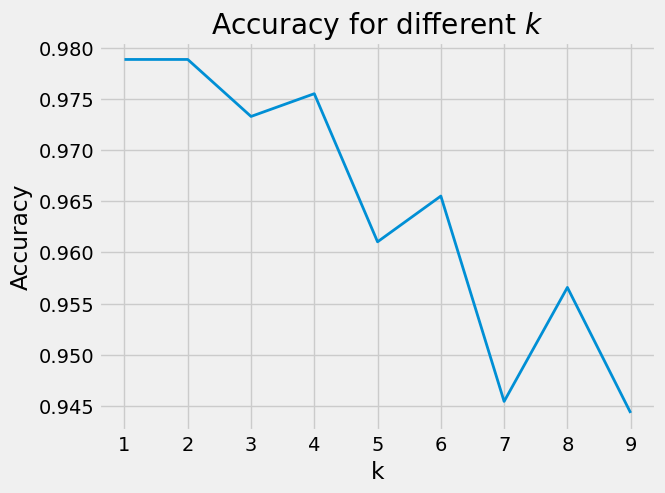

In [29]:
# Visualize accuracies against different values of k
plt.plot(np.array([1,2,3,4,5,6,7,8,9]), model_result, linewidth=2);
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Accuracy for different $k$');

Using the accuracy graph, we decided on K=2:

Accuracy on test set:

In [30]:
new_df = classify(x_train, y_train, x_test, response, 2)
acc = sum(y_test == new_df['Predicted_Class'])/len(y_test)

print(f'Accuracy for predicting Low vs High Income Country in the testing data is {acc}')

Accuracy for predicting Low vs High Income Country in the testing data is 0.9844155844155844


# Summary/Reflection of kNN Model:

For this model, we elected to use the response variable "Binarized Income" which is assigned “Lower” or “Upper” by the UNDP depending on a country’s gross income. Our first step was to binarize the categorical variable to prepare it for a kNN model. We then took the above relevant indicators in each category, scaled the data using min-max scaling, and implemented functions for Euclidean distance, closest k values, and predicted classification of the observation. We then split the data into training and testing sets. In order to tune k, we looped through k values 1-9 and conducted a 10 split KFold on the training set (too many observations for LOO), taking the average of the accuracies for each k and appending them to a list.

From the graph, we can see that peak accuracy occurs at k = 1 and k = 2. We chose k = 2 for our final model because predicting using a single nearest neighbor is likely overfitting. The accuracy of the testing data for our chosen model is 0.9789, or 97.89%. That means we correctly predicted the correct binarized income level of 97.89% of the training observations. Applying the kNN model to our testing data results in an accuracy of 98.44%. Therefore, our kNN model at k = 2 is an extremely good predictor of a country’s binarized income level.

Reflecting on our kNN model, there are certain limitations to be aware of. For one, our model includes many of the same indicators we used in predicting poverty headcount ratio. Some of these variables are highly collinear within their own respective categories, such as Voice and Accountability with Political Stability. If two indicators are collinear because they essentially represent the same factor, then including both indicators will inflate the importance of this factor. As a result, this factor would influence the distance computation more significantly, which affects the kNN classification. Thus, since we did not remove collinear predictors before running the kNN classification, it is possible that the factor represented by the collinear predictors are being given greater weight, which influences the output of the kNN model.